<a href="https://colab.research.google.com/github/germfsip/2132ReconocimientoPatrones/blob/main/Clase7RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Gerardo Martinez
##Lección 7 - Agrupamiento

## Comparativo entre técnicas de agrupamiento

Importar paquetes

In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture, metrics
from sklearn.preprocessing import StandardScaler

Crear datasets de prueba

In [2]:
## Crear datos de prueba
np.random.seed(0)
n_samples = 1500
X = 6 * [None]

# Circulos concentricos
xtemp, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X[0] = StandardScaler().fit_transform(xtemp)

# Lunas
xtemp, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
X[1] = StandardScaler().fit_transform(xtemp)

# Blobs
xtemp, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
X[2] = StandardScaler().fit_transform(xtemp)

# Plano sin agrupaciones
xtemp = np.random.rand(n_samples, 2)
X[3] = StandardScaler().fit_transform(xtemp)

# Blobs con deformación anisotropica
xtemp, _= datasets.make_blobs(n_samples=n_samples, random_state=170)
xtemp = np.dot(xtemp, [[0.6, -0.6], [-0.4, 0.8]])
X[4] = StandardScaler().fit_transform(xtemp)

# Blobs con varias varianzas
xtemp, _ = datasets.make_blobs(n_samples=n_samples,
                               cluster_std=[1.0, 2.5, 0.5])
X[5] = StandardScaler().fit_transform(xtemp)

# number of clusters
classes = [2,2,3,3,3,3]

Dibujar los datasets de prueba

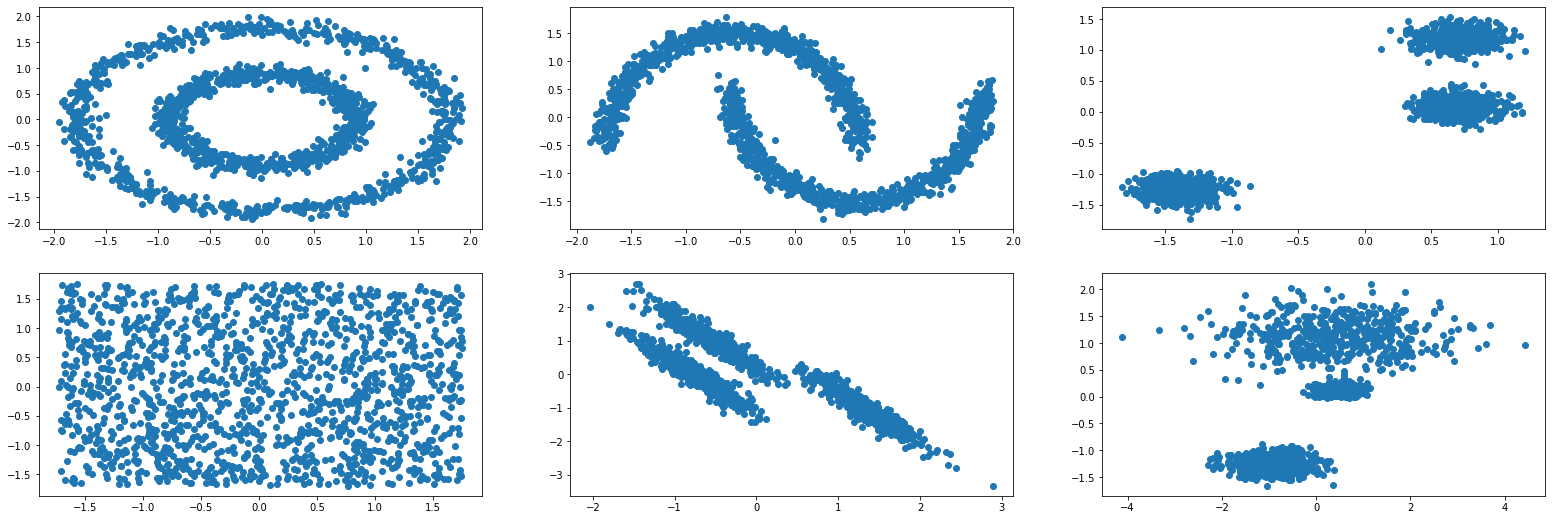

In [3]:
## Dibujar
plt.figure(figsize=(27,9))
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1])

Kmeans

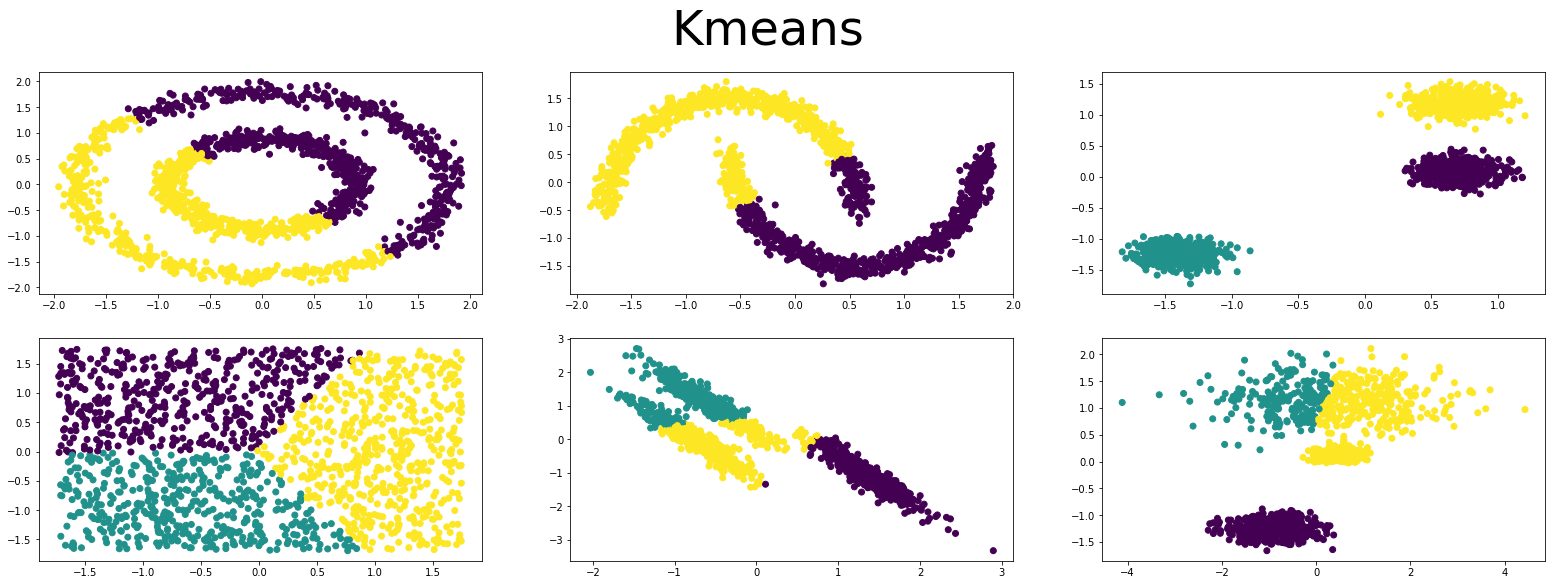

In [4]:
y = []
for c, x in zip(classes, X):
  model = cluster.KMeans(n_clusters=c)
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Kmeans', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

Birch

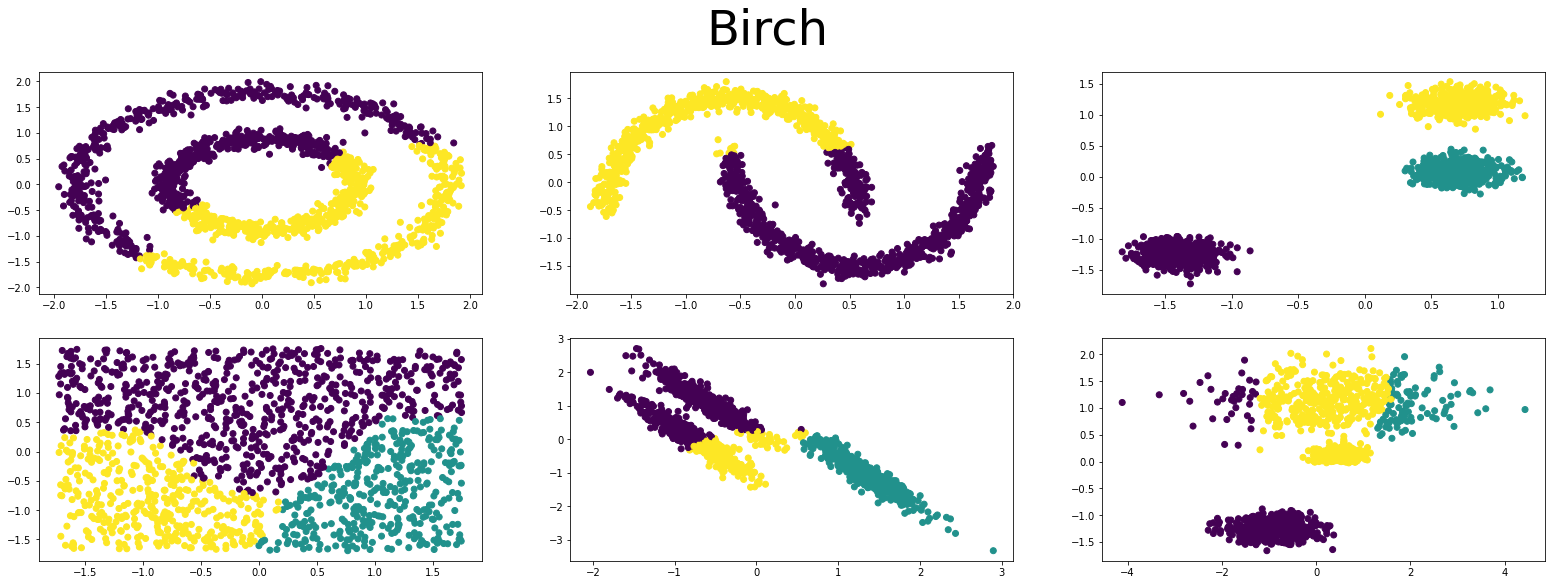

In [5]:
y = []
for c, x in zip(classes, X):
  model = cluster.Birch(n_clusters=c)
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Birch', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

Spectral Clustering

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


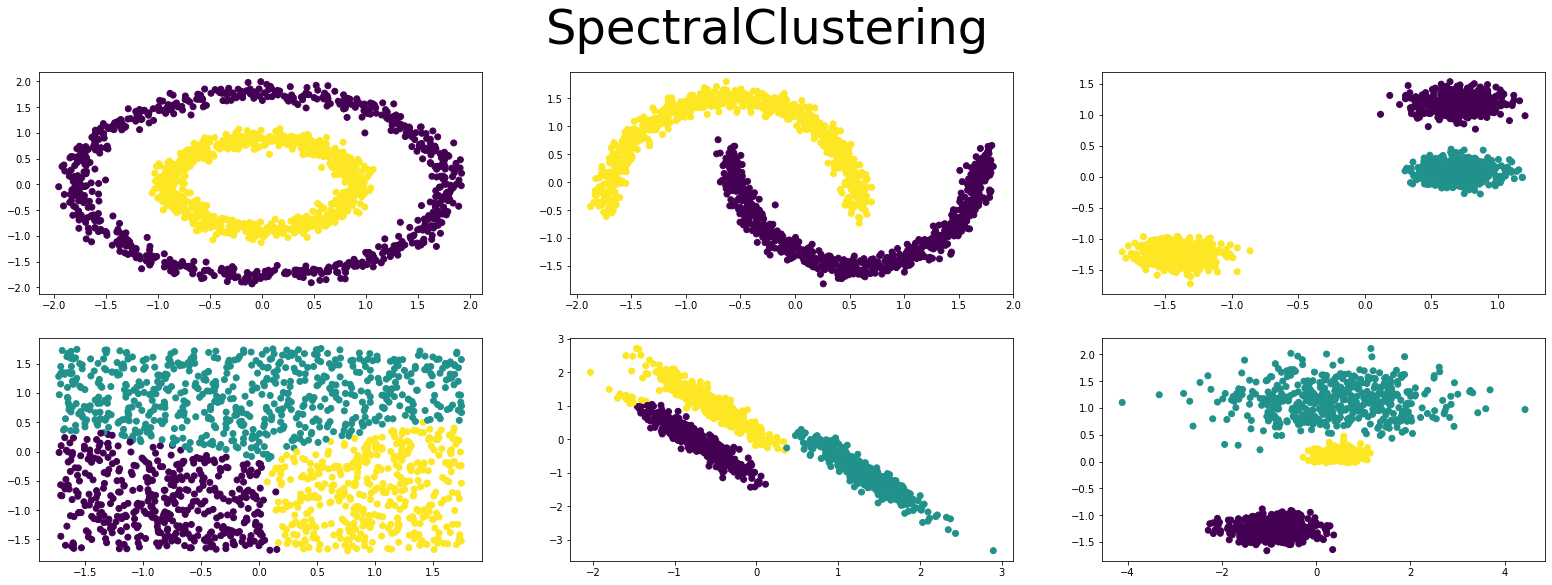

In [6]:
y = []
for c, x in zip(classes, X):
  model = cluster.SpectralClustering(n_clusters=c, 
                                     affinity="nearest_neighbors")
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('SpectralClustering', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

Gaussian Mixtures

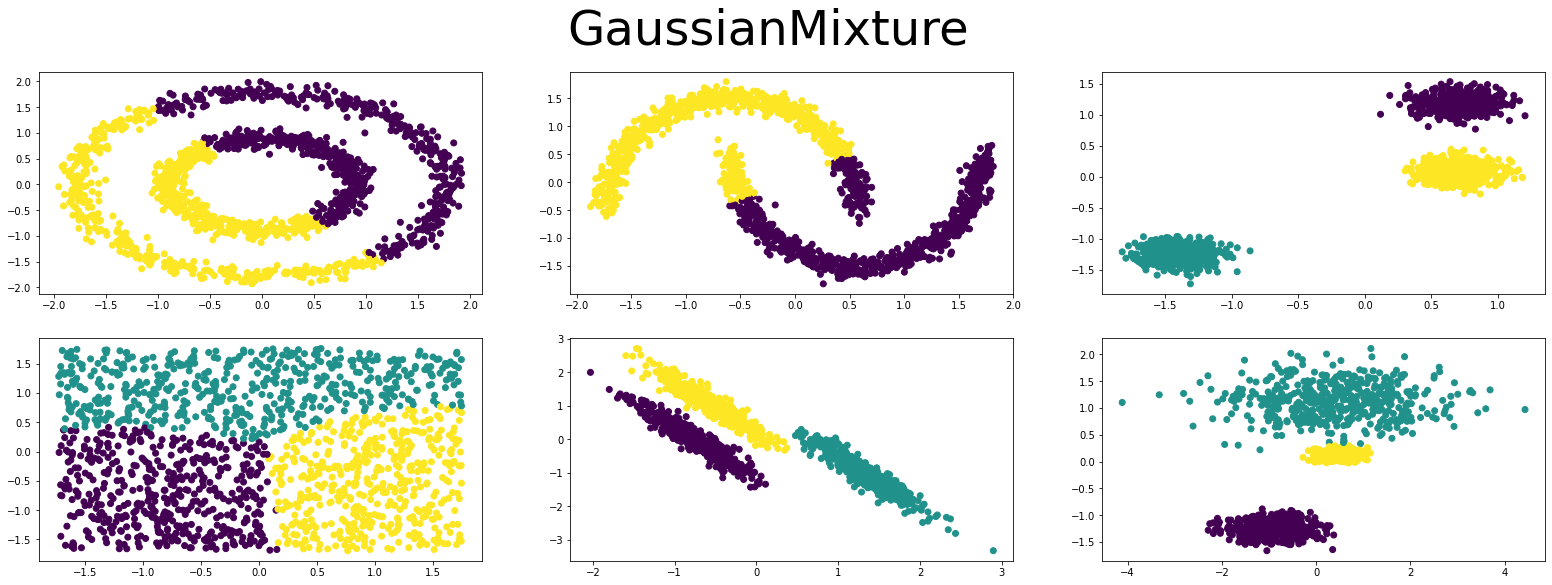

In [7]:
y = []
for c, x in zip(classes, X):
  model = mixture.GaussianMixture(n_components=c, covariance_type='full')
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('GaussianMixture', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

Optics

In [ ]:
y = []
for c, x in zip(classes, X):
  model = cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('OPTICS', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

DBSCAN

In [ ]:
y = []
eps = [0.3, 0.3, 0.3, 0.3, 0.15, 0.18]
for c, x, e in zip(classes, X, eps):
  model = cluster.DBSCAN(eps=e)
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(np.int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('DBSCAN', fontsize=48)
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

## Cuantización de imagenes con Kmeans

Importar paquetes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from google.colab import files

Carga una imagen a color

In [ ]:
uploaded = files.upload()

In [ ]:
img = mpimg.imread('lena.jpg')
img = np.array(img, dtype=np.float64) / 255

In [ ]:
w, h, d = img.shape
n_classes = 16

In [ ]:
img_array = np.reshape(img, (w * h, d))

In [ ]:
X = shuffle(img_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters = n_classes, random_state = 0)
kmeans.fit(X)
labels = kmeans.predict(img_array)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  X[:,2],c=X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],X[:,2],c=kmeans.predict(X))

In [ ]:
img_labels = np.reshape(labels, (w,h))
img_out = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
  for j in range(h):
    img_out[i][j][0] = kmeans.cluster_centers_[img_labels[i][j]][0]
    img_out[i][j][1] = kmeans.cluster_centers_[img_labels[i][j]][1]
    img_out[i][j][2] = kmeans.cluster_centers_[img_labels[i][j]][2]

In [ ]:
# Display all results, alongside original image
plt.title('Original image')
plt.imshow(img)

In [ ]:
plt.title('Quantized image with K-Means')
plt.imshow(img_out)

## Medidas de desempeño

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def kmeans_silhouette(data, n_clusters):
  plt.figure
  plt.xlim([-0.1, 1])
  clusterer = KMeans(n_clusters=n_clusters)
  cluster_labels = clusterer.fit_predict(data)

  silhouette_avg = silhouette_score(data, cluster_labels)
  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

  sample_silhouette_values = silhouette_samples(data, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

In [ ]:
calculate_silhouette(X, 2)